# 1. Компьютерное зрение

# 1.1 Работа с изображениями в нейронных сетях

### 1.1.1 Полносвязная сеть
<img src="images/II3/mnist_fc.png" width=60% height=60%>
Количество весов первого слоя = высота * ширина * каналы * количество нейронов скрытого слоя

### 1.1.2 Свёртка
Свертка (англ. convolution) — это операция, показывающая «схожесть» одной функции с отражённой и сдвинутой копией другой. Понятие свёртки обобщается для функций, определённых на группах, а также мер. 

<img src="images/convolution.jpeg" width=60% height=60%>

### 1.1.3 Примеры сверточных операторов

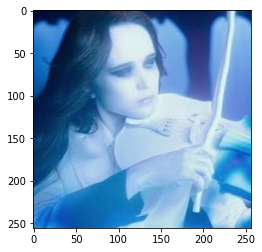

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread('data/Vanya.jpg')[..., ::-1]
plt.imshow(image)
plt.show()

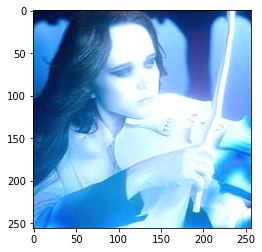

In [ ]:
# увеличение чёткости
kernel = np.array([
    [-0.1, -0.1, -0.1],
    [-0.1,    2, -0.1],
    [-0.1, -0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

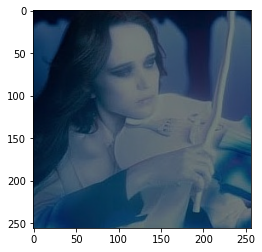

In [ ]:
# затемнение
kernel = np.array([
    [-0.1,  0.1, -0.1],
    [ 0.1,  0.5,  0.1],
    [-0.1,  0.1, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

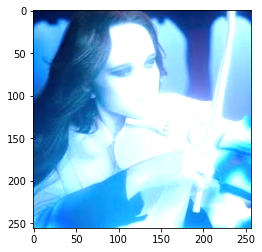

In [ ]:
# увеличение яркости
kernel = np.array([
    [-0.1,  0.2, -0.1],
    [ 0.2,    1,  0.2],
    [-0.1,  0.2, -0.1],
])
img_out = cv2.filter2D(image, -1, kernel)
plt.imshow(img_out)
plt.show()

### 1.1.4 Ядра нейронной сети

В процессе обучения нейронной сети, происходит формирование фильтров для извлечения определённых признаков из изображения (или из карты более низкоуровневых признаков)

Каждый из 96 фильтров, показанных здесь, имеет размер 11x11x3

<img src="images/II3/kernels.jpeg" width=60% height=60%>

## 1.2 Свёрточный слой

<img src="images/II3/conv1.png" width=60% height=60%>

## 1.3 Max Pooling

<img src="images/II3/maxpool.jpeg" width=60% height=60%>

## 1.4 Свёрточная сеть

<img src="images/II3/convnet.jpeg" width=80% height=80%>

Карты активации примера архитектуры ConvNet. Первоначальные данные представляют собой необработанные пиксели изображения (слева), а последний выход хранит оценки классов (справа).

### 1.4.1 Padding

<img src="images/II3/pad.png" width=60% height=60%>

Добавляет рамку вокруг карты признаков, заполненной нулями (можно и не нулями)
Обычное используется, чтоб размер карты признаков после сверток не изменялся
Можно ли просто так добавлять нули?
Нет, сеть может слишком сильно начинать ориентироваться на добавленные нули

### 1.4.2 Stride

<img src="images/II3/stride.png" width=60% height=60%>

Шаг (stride) 3 и 2 по высоте и ширине соответственно.

Регулирует шаг свертки (может быть адаптивным)
Уменьшает размерность
Рецептивное поле?

## 1.5 Классификация изображений (датасет ImageNet)

<img src="images/II3/imagenet.jpeg" width=30% height=30%>

На август 2017 года в ImageNet 14 197 122 изображения, разбитых на 21 841 категорию.

<img src="images/II3/imagenet_err.png" width=60% height=60%>

### 1.5.1 Архитектура AlexNet
Архитектура AlexNet состоит из пяти свёрточных слоёв, между которыми располагаются pooling-слои и слои нормализации, а завершают нейросеть три полносвязных слоя.  
На схеме архитектуры все выходные изображения делятся на два одинаковых участка — это связано с тем, что нейросеть обучалась на старых GPU GTX580, у которых было всего 3 ГБ видеопамяти. Для обработки использовались две видеокарты, чтобы параллельно выполнять операции над двумя частями изображения.

<img src="images/II3/alexnet.png" width=80% height=80%>

### 1.5.2 Архитектура VGG
Основная идея VGG-архитектур — использование большего числа слоёв с фильтрами меньшего размера. Существуют версии VGG-16 и VGG-19 с 16 и 19 слоями соответственно.  
С маленькими фильтрами получается не так много параметров, но при этом мы сможем гораздо эффективнее обрабатывать их.

<img src="images/II3/vgg.png" width=50% height=50%>

### 1.5.3 Архитектура ResNet
Создатели ResNet решили не складывать слои друг на друга для изучения отображения нужной функции напрямую, а использовать остаточные блоки, 
которые пытаются «подогнать» это отображение. Так ResNet стала первой остаточной нейронной сетью. 
Иначе говоря, она «перепрыгивает» через некоторые слои. Они больше не содержат признаков и используются для нахождения остаточной функции H(x) = F(x) + x вместо того, чтобы искать H(x) напрямую.

<img src="images/II3/res_block.png" width=80% height=80%>

В результате экспериментов с ResNet выяснилось, что очень глубокие сети действительно можно обучить без ухудшения точности. Нейросеть достигла наименьшей ошибки в задачах классификации, которая превзошла даже человеческий результат.

<img src="images/II3/resnet.png" width=50% height=50%>

## 1.6 Сегментация изображений

<img src="images/segment.jpg" width=80% height=80%>

### 1.6.1 Fully Convolutional Network

Полносвёрточные сети

<img src="images/II3/FCN8.ppm" width=80% height=80%>

сначала бежим, не уменьшая размерность, извлекая локальные признаки(?)
потом делаем пулинг\страйд, уменьшая размерность
есть обратная свертка) та же самая свертка, но результат - ядро свертки, умноженное на элемент из карты признаков, увеличивает карту признаков

### 1.6.2 SegNet

<img src="images/II3/segnet.png" width=80% height=80%>

### 1.6.3 UNet

<img src="images/II3/unet.png" width=80% height=80%>

U-Net — это свёрточная нейронная сеть, которая была создана в 2015 году для сегментации биомедицинских изображений в отделении Computer Science Фрайбургского университета. Архитектура сети представляет собой полносвязную свёрточную сеть, модифицированную так, чтобы она могла работать с меньшим количеством примеров (обучающих образов) и делала более точную сегментацию.

### 1.6.4 Метрика
Intersection over union (IoU)

<img src="images/II3/iou.png" width=40% height=40%>

сверху: то, что нужно было задетектировать и то,что удалось задетектировать; снизу: площадь объединения 

### 1.6.5 Функции потерь

* Cross entropy
* Weighted cross entropy
* DICE

$$ DC = 1 - {2\sum y_i p_i \over \sum y_i + \sum p_i} $$

## 1.7 Детекция

<img src="images/detect.jpg" width=80% height=80%>

### 1.7.1 Non-maximum Suppression (NMS)
Алгоритм:  
1) Выбрать область с наибольшией уверенностью и запомнить его  
2) Найти IoU с оставшимися областями  
3) Удалить области с IoU больше заданного порога  
4) Повторять пп. 1-3, пока все области не отфильтруются  

<img src="images/II3/nms.png" width=80% height=80%>

Предсказание объектов с наибольшей значимостью

### 1.7.2 Two Shot Detectors

#### 1.7.2.1 R-CNN

<img src="images/II3/rcnn.png" width=80% height=80%>

<img src="images/II3/rcnn_conv.png" width=50% height=50%>

#### 1.7.2.2 Fast R-CNN

<img src="images/II3/fast_rcnn.png" width=80% height=80%>

#### 1.7.2.3 Faster R-CNN

<img src="images/II3/faster_rcnn.png" width=50% height=50%>

#### 1.7.2.4 Сравнение скоростей

<img src="images/II3/rcnn_speed.png" width=80% height=80%>

### 1.7.3 Single Shot Detectors

#### 1.7.3.1 Yolo
Изображение делится на части и предсказывается отдельно для каждой части

<img src="images/II3/yolo_grid.jpeg" width=80% height=80%>

Каждая часть предсказывает координаты, уверенность и вероятность каждого из 20 классов

<img src="images/II3/yolo.png" width=80% height=80%>

#### 1.7.3.2 SSD - single shot detection

<img src="images/II3/ssd.jpeg" width=80% height=80%>

# 2 Рекуррентные нейронные сети

## 2.1 RNN
Рекуррентные нейронные сети (RNN) — вид нейронных сетей, где связи между элементами образуют направленную последовательность. Благодаря этому появляется возможность обрабатывать серии событий во времени или последовательные пространственные цепочки. В отличие от многослойных перцептронов, рекуррентные сети могут использовать свою внутреннюю память для обработки последовательностей произвольной длины. Поэтому сети RNN применимы в таких задачах, где нечто целостное разбито на части, например: распознавание рукописного текста или распознавание речи.

<img src="https://habrastorage.org/web/5c8/0fa/c22/5c80fac224d449209d888d18ea1111a8.png" alt="RNN">

## 2.2 Внутреннее устройство простых RNN
Входной вектор и вектор внутренней памяти объединяются и отправляются на полносвязный слой с функцией активации *tanh*

<img src="https://habrastorage.org/web/47d/ee6/2c3/47dee62c3af8498c946befa1f3330d90.png"  alt="RNN In"  height=70% width=70%>

$$h_t = tanh(w * [h_{t-1}; x_t])$$

## 2.3 Виды RNN

<img src="images/II5/rnns.jpg"  alt="RNN In"  height=70% width=70%>

### Many to many (Генерация текста)
<img src="images/II5/rnn_m2m.jpeg"  alt="RNN In"  height=50% width=50%>

### One to many (Подпись изображений)
<img src="images/II5/rnn_o2m.png"  alt="RNN In"  height=70% width=70%>
Началом и концом предложения являются специальные слова: $<start>$ $<end>$

## 2.4 LSTM
Долгая краткосрочная память (Long short-term memory; LSTM) – особая разновидность архитектуры рекуррентных нейронных сетей, способная к обучению долговременным зависимостям.

<img src="https://habrastorage.org/web/67b/04f/73b/67b04f73b4c34ba38edfa207e09de07c.png" alt="LSTM">

* «вентиль забывания» контролирует меру сохранения значения в памяти
* «входной вентиль» контролирует меру вхождения нового значения в память
* «выходной вентиль» контролирует меру того, в какой степени значение, находящееся в памяти, используется при расчёте выходной функции активации для блока

### «Вентиль забывания»
<img src="https://habrastorage.org/web/a5f/31a/104/a5f31a104b184217aca105de9ab6d320.png">

### «Входной вентиль»
<img src="https://habrastorage.org/web/248/bf4/a75/248bf4a75ab74bf180b9c0e2e2cc5a58.png">

### «Выходной вентиль»
<img src="https://habrastorage.org/web/16d/5b5/783/16d5b5783ba34244afcf0f240133fb28.png">

## 2.5 GRU
Управляемые рекуррентные блоки (Gated Recurrent Units, GRU) — механизм вентилей для рекуррентных нейронных сетей, представленный в 2014 году. Было установлено, что его эффективность при решении задач моделирования музыкальных и речевых сигналов сопоставима с использованием долгой краткосрочной памяти (LSTM). По сравнению с LSTM у данного механизма меньше параметров, т.к. отсутствует выходной вентиль.

<img src="https://www.data-blogger.com/wp-content/uploads/2017/08/gru.png" alt="GRU">

## 2,6 Примеры Архитектур, базирующихся на LSTM
### 2.6.1 Объединение нескольких RNN

<img src="images/II5/rnn_arch.png"  height=50% width=50%>

### 2.6.2 Двунаправленные

<img src="images/II5/rnn_bi.jpg"  height=70% width=70%>

### 2.6.3 Seq2Seq

<img src="images/II5/seq2seq.png"  height=70% width=70%>

### 2.6.4 Архитектура Google’s Neural Machine Translation

<img src="images/II5/rnn_ggle.png"  height=100% width=100%>

## 2.7 Механизм внимания (Attention)

<img src="images/II5/rnn_att.png"  height=30% width=30%>

<img src="images/II5/att1.jpeg"  height=90% width=90%>
<img src="images/II5/att2.jpeg"  height=90% width=90%>

### Результат
<img src="images/II5/map_att.png"  height=70% width=70%>